In [41]:
from gnn_scheduler.jssp import load_all_from_benchmark, load_metadata
import pandas as pd

instances = load_all_from_benchmark(if_has_optimum=True)
len(instances)

130

In [42]:
# create a dataframe with columns: instance_name, n_jobs, n_machines, total_time, optimum
names = []
n_jobs = []
n_machines = []
total_time = []
optimum = []
max_job_time = []
max_machine_load = []
mean_machine_load = []
mean_machine_load2 = []

for instance in instances:
    names.append(instance.name)
    n_jobs.append(instance.n_jobs)
    n_machines.append(instance.n_machines)
    total_time.append(instance.total_duration)
    optimum.append(instance.upper_bound)
    max_job_time.append(instance.max_job_duration)
    max_machine_load.append(instance.max_machine_load)
    mean_machine_load.append(instance.mean_machine_load)

df = pd.DataFrame({
    'instance_name': names,
    'n_jobs': n_jobs,
    'n_machines': n_machines,
    'total_time': total_time,
    'optimum': optimum,
    'max_job_time': max_job_time,
    'max_machine_load': max_machine_load,
    'mean_machine_load': mean_machine_load,
})

df.head()

,instance_name,n_jobs,n_machines,total_time,optimum,max_job_time,max_machine_load,mean_machine_load
0,abz5,10,10,7773,1234,859,868,777.300000
1,abz6,10,10,5946,943,742,688,594.600000
2,abz7,20,15,7366,656,410,556,491.066667
3,abz9,20,15,7442,678,467,563,496.133333
4,ft06,6,6,197,55,47,43,32.833333


In [43]:
df["optimum_div_max_job_time"] = df["optimum"] / df["max_job_time"]
df["optimum_div_max_machine_load"] = df["optimum"] / df["max_machine_load"]
df["optimum_div_mean_machine_load"] = df["optimum"] / df["mean_machine_load"]

In [44]:
optimum_div_x = df[["optimum_div_max_job_time", "optimum_div_max_machine_load", "optimum_div_mean_machine_load"]].copy()
optimum_div_x.describe()

,optimum_div_max_job_time,optimum_div_max_machine_load,optimum_div_mean_machine_load
count,130.000000,130.000000,130.000000
mean,2.185670,1.136349,1.333646
std,0.975507,0.167375,0.245146
min,1.170213,1.000000,1.064243
25%,1.421966,1.000000,1.126151
50%,1.791055,1.042597,1.214644
75%,2.614704,1.253350,1.587403
max,4.435459,1.646967,1.971491


In [45]:
# Count how many ones are in optimum_div_max_machine_load
(df["optimum_div_max_machine_load"] == 1).sum()

51

<Axes: ylabel='Frequency'>

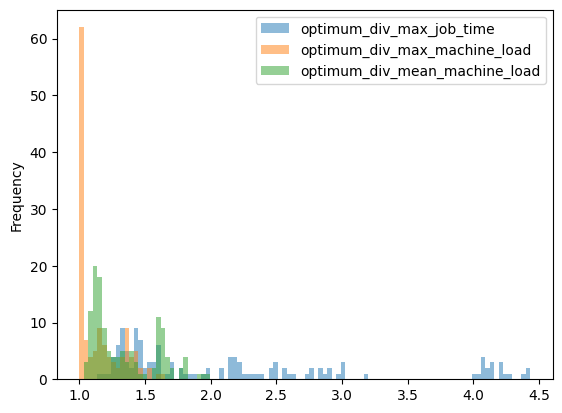

In [46]:
optimum_div_x.plot.hist(bins=100, alpha=0.5)

In [47]:
# New lower bound: max(max_job_time, max_machine_load)
df["max_job_machine_time"] = df[["max_job_time", "max_machine_load"]].max(axis=1)
optimum_div_x.loc[:, "optimum_div_max_job_machine_time"] = df["optimum"] / df["max_job_machine_time"]

<Axes: ylabel='Frequency'>

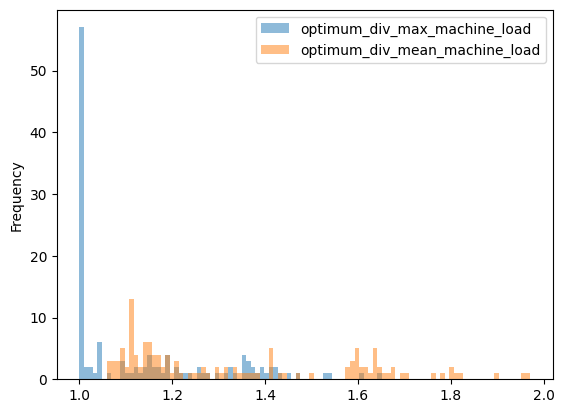

In [51]:
optimum_div_x[['optimum_div_max_machine_load', 'optimum_div_mean_machine_load']].plot.hist(bins=100, alpha=0.5)

In [ ]:
optimum_div_x.describe()

,optimum_div_max_job_time,optimum_div_max_machine_load,optimum_div_mean_machine_load,optimum_div_max_job_machine_time
count,130.000000,130.000000,130.000000,130.000000
mean,2.185670,1.136349,1.333646,1.125097
std,0.975507,0.167375,0.245146,0.149913
min,1.170213,1.000000,1.064243,1.000000
25%,1.421966,1.000000,1.126151,1.000000
50%,1.791055,1.042597,1.214644,1.042597
75%,2.614704,1.253350,1.587403,1.232397
max,4.435459,1.646967,1.971491,1.550926
